In [1]:
# Moving average  
import yfinance as yf
import numpy as np

# defining data frame -> smp500, all available data
df = yf.download('SPY', period="max")

# flatten the multi-level columns
df.columns = df.columns.get_level_values(0)

print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Date                                                           
1993-01-29  24.241419  24.258660  24.137970  24.258660  1003200
1993-02-01  24.413816  24.413816  24.258644  24.258644   480500
1993-02-02  24.465548  24.482789  24.344858  24.396582   201300
1993-02-03  24.724155  24.741397  24.482776  24.500017   529400
1993-02-04  24.827610  24.879334  24.534506  24.810369   531500


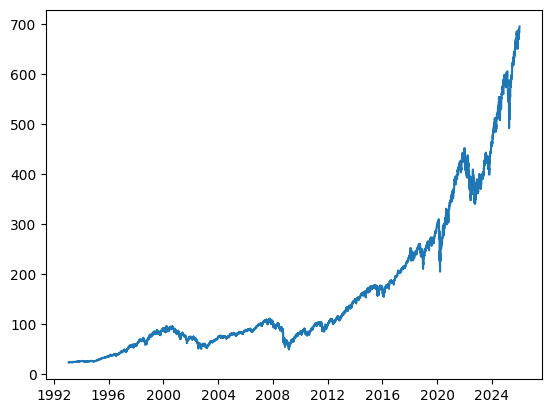

In [2]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])

In [3]:
# defining moving average
# #df['MA'] = df['Close'].rolling(3).mean() # 3-window moving average
df['MA'] = df['Close'].rolling(50).mean()
df

Price,Close,High,Low,Open,Volume,MA
Date,,,,,,
1993-01-29,24.241419,24.258660,24.137970,24.258660,1003200,NaN
1993-02-01,24.413816,24.413816,24.258644,24.258644,480500,NaN
1993-02-02,24.465548,24.482789,24.344858,24.396582,201300,NaN
1993-02-03,24.724155,24.741397,24.482776,24.500017,529400,NaN
1993-02-04,24.827610,24.879334,24.534506,24.810369,531500,NaN
...,...,...,...,...,...,...
2026-01-06,691.809998,692.320007,687.780029,687.929993,69273800,677.978640
2026-01-07,689.580017,693.960022,689.320007,692.190002,75588300,678.265146
2026-01-08,689.510010,690.619995,687.489990,688.820007,64019200,678.390924


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY close vs moving average')

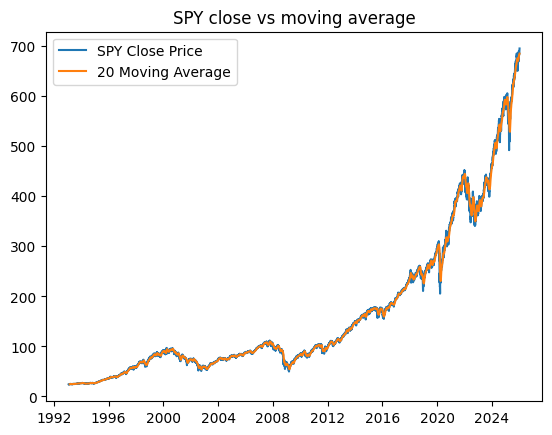

In [4]:
# plotting moving average and closing price
TICKER = 'SPY' 
WINDOW = 20 # global variable for moving average window size

df = yf.download(TICKER, period="max")
df['MA'] = df['Close'].rolling(WINDOW).mean()

# looking at smaller frames

plt.plot(df['Close']) # plotting the close price
plt.plot(df['MA']) # plotting moving average
plt.legend([f'{TICKER} Close Price', f'{WINDOW} Moving Average'])
plt.title(f'{TICKER} close vs moving average')

In [ ]:
df.columns = df.columns.get_level_values(0)

def add_ma_strategy(df):
  df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
  return df

df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift(1)) - 1 # shift by 1 to avoid lookahead bias

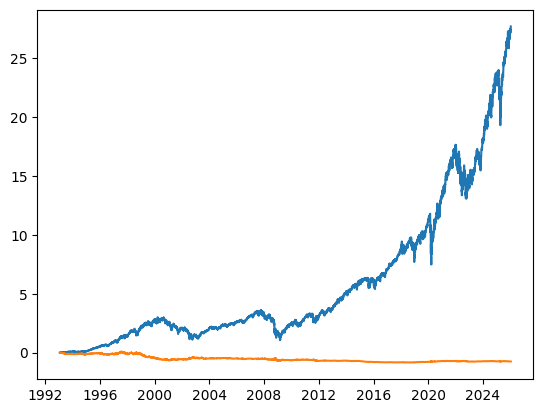

In [8]:
plt.plot(df['asset_cumulative'])
plt.plot(df['strategy_cumulative'])

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-01-29,24.241407,24.258649,24.137959,24.258649,1003200,NaN,NaN,NaN,NaN
1993-02-01,24.413824,24.413824,24.258651,24.258651,480500,NaN,-1.0,0.007112,-0.007112
1993-02-02,24.465551,24.482793,24.344862,24.396586,201300,NaN,-1.0,0.009246,-0.009216
1993-02-03,24.724154,24.741395,24.482774,24.500015,529400,NaN,-1.0,0.019914,-0.019689
1993-02-04,24.827614,24.879338,24.534510,24.810372,531500,NaN,-1.0,0.024182,-0.023791
...,...,...,...,...,...,...,...,...,...
2026-01-06,691.809998,692.320007,687.780029,687.929993,69273800,683.406097,1.0,27.538359,-0.754038
2026-01-07,689.580017,693.960022,689.320007,692.190002,75588300,683.804303,1.0,27.446369,-0.754830
2026-01-08,689.510010,690.619995,687.489990,688.820007,64019200,684.228424,1.0,27.443481,-0.754855


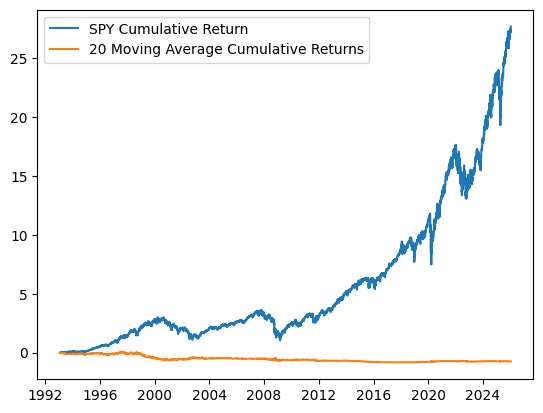

In [19]:
TICKER = 'SPY' # name of the ticker
WINDOW = 20 # global variable for moving average window size

def get_data(): # download data 
  df = yf.download(TICKER, period="max")
  df['MA'] = df['Close'].rolling(WINDOW).mean()
  return df.dropna()

def add_strategy(): # add strategy column based on moving average
  df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
  df['Strategy'] = df['Strategy'].shift(1) # shift by 1 to avoid lookahead bias
  return df

def test_strategy(): # test strategy performance and plot returns
  df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
  df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1 # shift by 1 to avoid lookahead bias 

  # plotting returns 
  plt.plot(df['asset_cumulative'])
  plt.plot(df['strategy_cumulative'])
  plt.legend([f'{TICKER} Cumulative Return', f'{WINDOW} Moving Average Cumulative Returns'])
  return df

def main():
  df = get_data()
  df = add_strategy()
  df = test_strategy()
  return df

main()